Epoch    0  Loss 1.0979  Acc 40.83%
Epoch  100  Loss 0.3200  Acc 92.50%
Epoch  200  Loss 0.2521  Acc 93.33%
Epoch  300  Loss 0.2125  Acc 95.00%
Epoch  400  Loss 0.1857  Acc 95.00%
Epoch  500  Loss 0.1663  Acc 95.83%
Epoch  600  Loss 0.1518  Acc 95.83%
Epoch  700  Loss 0.1404  Acc 96.67%
Epoch  800  Loss 0.1313  Acc 96.67%
Epoch  900  Loss 0.1238  Acc 96.67%


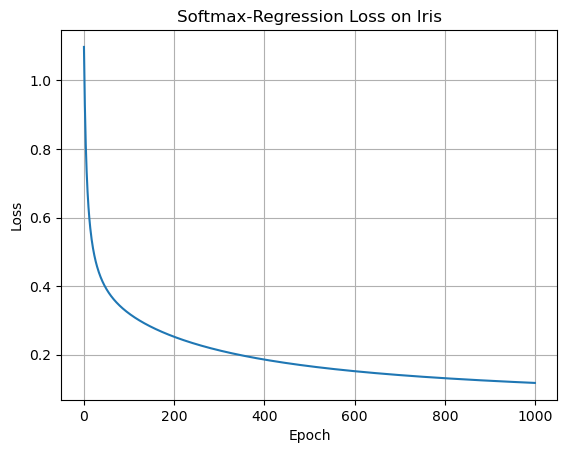

Test-set accuracy: 93.33%
Predicted class: setosa


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


iris = datasets.load_iris()
X = iris.data.astype(float)
y = iris.target


encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y.reshape(-1, 1))


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=y
)

n_samples, n_features = X_train.shape
n_classes = Y_train.shape[1]


def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(Y_true, Y_pred):
    return -np.mean(np.sum(Y_true * np.log(Y_pred + 1e-9), axis=1))

def accuracy(Y_true, Y_pred):
    return np.mean(np.argmax(Y_true, axis=1) == np.argmax(Y_pred, axis=1)) * 100


rng = np.random.default_rng(0)
W = 0.01 * rng.standard_normal((n_features, n_classes))
b = np.zeros((1, n_classes))

lr      = 0.1
epochs  = 1000
losses  = []

for epoch in range(epochs):
    Z      = X_train @ W + b
    A      = softmax(Z)
    loss   = cross_entropy(Y_train, A)
    losses.append(loss)

    dW = (X_train.T @ (A - Y_train)) / n_samples
    db = np.mean(A - Y_train, axis=0, keepdims=True)

    W -= lr * dW
    b -= lr * db

    if epoch % 100 == 0:
        acc = accuracy(Y_train, A)
        print(f"Epoch {epoch:4d}  Loss {loss:.4f}  Acc {acc:.2f}%")


plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Softmax-Regression Loss on Iris")
plt.grid(True)
plt.show()


A_test  = softmax(X_test @ W + b)
test_acc = accuracy(Y_test, A_test)
print(f"Test-set accuracy: {test_acc:.2f}%")


sample = np.array([[5.1, 3.5, 1.4, 0.2]])
sample_std = scaler.transform(sample)
pred = np.argmax(softmax(sample_std @ W + b), axis=1)[0]
print("Predicted class:", iris.target_names[pred])
